In [70]:
import pandas as pd

In [71]:
data = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\wine.csv')

In [72]:
data

country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
0                                 Vulkà Bianco      87    NaN   
1                                     Avidagos      87   15.0   
2                                          NaN      87   14.0   
3                         Reserve Late Harvest      87   13.0   
4           Vintner's Reserve Wild Child Block      87   65.0   
...                                        ...     ...    ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90   28.0   
129967                                     NaN      90   75.0   
129968                                   Kritt      90   30.0   
129969                                     NaN      90   32.0   
129970           Lieu-dit Harth Cuvée Caroline      90   21.0   

                 province             region_1           region_2  \
0       Sicily & Sardinia                 Etna                NaN   
1                   Douro                  NaN                NaN   
2                  Oregon    Willamette Valley  Willamette Valley   
3                Michigan  Lake Michigan Shore                NaN   
4                  Oregon    Willamette Valley  Willamette Valley   
...                   ...                  ...                ...   
129966              Mosel                  NaN                NaN   
129967             Oregon               Oregon       Oregon Other   
129968             Alsace               Alsace                NaN   
129969             Alsace               Alsace                NaN   
129970             Alsace               Alsace                NaN   

               taster_name taster_twitter_handle  \
0            Kerin O’Keefe          @kerinokeefe   
1               Roger Voss            @vossroger   
2             Paul Gregutt           @paulgwine    
3       Alexander Peartree                   NaN   
4             Paul Gregutt           @paulgwine    
...                    ...                   ...   
129966  Anna Lee C. Iijima                   NaN   
129967        Paul Gregutt           @paulgwine    
129968          Roger Voss            @vossroger   
129969          Roger Voss            @vossroger   
129970          Roger Voss            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  Gewürztraminer 

In [73]:
data['taster_name'].nunique()

19

In [74]:
data['price'].max()

3300.0

In [75]:
data.duplicated().sum()

9983

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [77]:
data.drop_duplicates(inplace=True)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   region_2               46769 non-null   object 
 8   taster_name            95071 non-null   object 
 9   taster_twitter_handle  90542 non-null   object 
 10  title                  119988 non-null  object 
 11  variety                119987 non-null  object 
 12  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.8+ MB


Если какой-то из признаков имеет более 30-40 % пропусков, лучше избавьтесь от него: его заполнение может привести к сильному искажению общего распределения, а удаление записей — к большой утрате данных.

Заполняйте данные с умом! Если перед вами количественный признак, то использование нецелого числа в качестве константы является как минимум нелогичным.

Вы можете оставить пропуски как есть, просто заменив их на какой-то специальный символ. Например, для числовых неотрицательных признаков можно использовать число -1, а для категориальных — строку 'unknown'.

In [79]:
thresh = data.shape[0]*0.6
data = data.dropna(thresh=thresh, axis=1)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119929 non-null  object 
 1   description            119988 non-null  object 
 2   designation            85443 non-null   object 
 3   points                 119988 non-null  int64  
 4   price                  111593 non-null  float64
 5   province               119929 non-null  object 
 6   region_1               100428 non-null  object 
 7   taster_name            95071 non-null   object 
 8   taster_twitter_handle  90542 non-null   object 
 9   title                  119988 non-null  object 
 10  variety                119987 non-null  object 
 11  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


In [81]:
data

country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
0                                 Vulkà Bianco      87    NaN   
1                                     Avidagos      87   15.0   
2                                          NaN      87   14.0   
3                         Reserve Late Harvest      87   13.0   
4           Vintner's Reserve Wild Child Block      87   65.0   
...                                        ...     ...    ...   
129966  Brauneberger Juffer-Sonnenuhr Spätlese      90   28.0   
129967                                     NaN      90   75.0   
129968                                   Kritt      90   30.0   
129969                                     NaN      90   32.0   
129970           Lieu-dit Harth Cuvée Caroline      90   21.0   

                 province             region_1         taster_name  \
0       Sicily & Sardinia                 Etna       Kerin O’Keefe   
1                   Douro                  NaN          Roger Voss   
2                  Oregon    Willamette Valley        Paul Gregutt   
3                Michigan  Lake Michigan Shore  Alexander Peartree   
4                  Oregon    Willamette Valley        Paul Gregutt   
...                   ...                  ...                 ...   
129966              Mosel                  NaN  Anna Lee C. Iijima   
129967             Oregon               Oregon        Paul Gregutt   
129968             Alsace               Alsace          Roger Voss   
129969             Alsace               Alsace          Roger Voss   
129970             Alsace               Alsace          Roger Voss   

       taster_twitter_handle  \
0               @kerinokeefe   
1                 @vossroger   
2                @paulgwine    
3                        NaN   
4                @paulgwine    
...                      ...   
129966                   NaN   
129967           @paulgwine    
129968            @vossroger   
129969            @vossroger   
129970            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  Gewürztraminer   

                                          winery  
0                                        Nicosia  
1                            Quinta dos Avidagos  
2                                      Rainstorm  
3                   

In [82]:
import seaborn as sns

<Axes: >

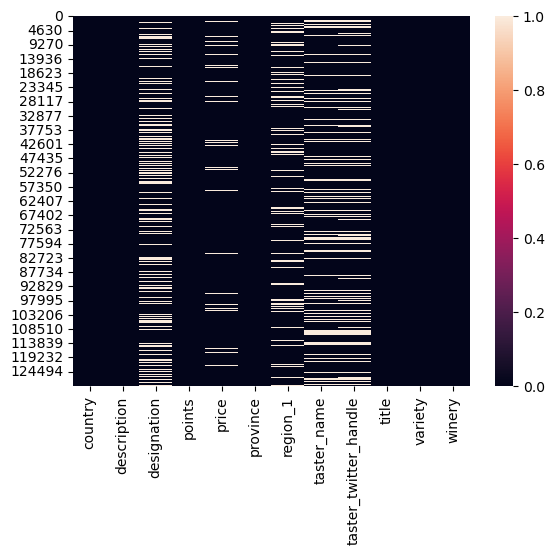

In [83]:
sns.heatmap(data.isnull()) # наглядная карта пропусков

In [84]:
data['designation'] = data['designation'].fillna('unknown')
data['region_1'] = data['region_1'].fillna('unknown')
data['taster_name'] = data['taster_name'].fillna('unknown')
data['taster_twitter_handle'] = data['taster_twitter_handle'].fillna('unknown')

# признаки с маленьким количеством пропусков заменим на самые частовречающиеся значения
data['country'] = data['country'].fillna('US')
data['price'] = data['price'].fillna(data['price'].mean())
data['province'] = data['province'].fillna('California')
data['variety'] = data['variety'].fillna('Pinot Noir')

C:\Users\user\AppData\Local\Temp\ipykernel_14356\1372955372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['designation'] = data['designation'].fillna('unknown')
C:\Users\user\AppData\Local\Temp\ipykernel_14356\1372955372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['region_1'] = data['region_1'].fillna('unknown')
C:\Users\user\AppData\Local\Temp\ipykernel_14356\1372955372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[r

<Axes: >

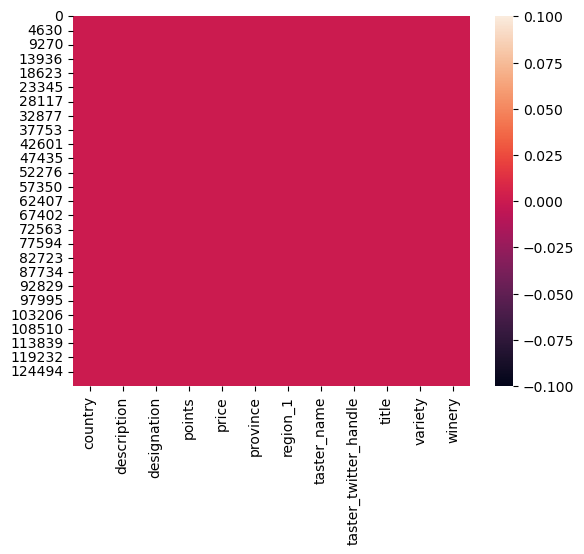

In [85]:
sns.heatmap(data.isnull())

In [86]:
data['price'] = data['price'].fillna(data['price'].mean())

C:\Users\user\AppData\Local\Temp\ipykernel_14356\3616098026.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['price'] = data['price'].fillna(data['price'].mean())


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119988 entries, 0 to 129970
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                119988 non-null  object 
 1   description            119988 non-null  object 
 2   designation            119988 non-null  object 
 3   points                 119988 non-null  int64  
 4   price                  119988 non-null  float64
 5   province               119988 non-null  object 
 6   region_1               119988 non-null  object 
 7   taster_name            119988 non-null  object 
 8   taster_twitter_handle  119988 non-null  object 
 9   title                  119988 non-null  object 
 10  variety                119988 non-null  object 
 11  winery                 119988 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 11.9+ MB


In [88]:
#df = df.to_csv('wine_cleared.csv', index=False)

In [89]:
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\wine.csv')

In [90]:
profile = ProfileReport(df, title="Pandas Profiling Report")

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:07<00:00,  1.75it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [91]:
import pandas as pd
import sweetviz as sv
import numpy as np

df = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\wine.csv')

In [94]:
report = sv.analyze(df)
report.show_html()

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [95]:
pip install dtale

     ---------------------------------------- 0.0/642.7 kB ? eta -:--:--
     --- ----------------------------------- 61.4/642.7 kB 1.1 MB/s eta 0:00:01
     ---------- --------------------------- 174.1/642.7 kB 1.7 MB/s eta 0:00:01
     ----------------- -------------------- 297.0/642.7 kB 2.0 MB/s eta 0:00:01
     -------------------------------------  634.9/642.7 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 642.7/642.7 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/17.6 MB ? eta -:--:--
    --------------------------------------- 0.2/17.6 MB 14.1 MB/s eta 0:00:02
    --------------------------------------- 0.4/17.6 MB 4.1 MB/s eta 0:00:05
   - -------------------------------------- 0.8/17.6 MB 5.8 MB/s eta 0:00:03
   -- ------------------------------------- 1.1/17.6 MB 5.7 MB/s eta 0:00:03
   --- ------------------------------------ 1.

In [96]:
import pandas as pd
import dtale

df = pd.read_csv(r'C:\Users\user\Desktop\Skilfactory\data\wine.csv')

In [97]:
d = dtale.show(df)
d